# Decision Trees
---
In this notebook we will discuss how the decision trees algorithm works and how they do the math to compute the nodes.

<img src="./images/decision-tree-example.png" width="500px" height="350px">

In [3]:
# Changing some matplotlib styles to fit this notebook better.
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

For this example we will use the Iris Dataset.

The Iris dataset is composed of three species:
*   Iris setosa
*   Iris versicolor
*   Iris virginica

The distribution of the flowers is as follow:

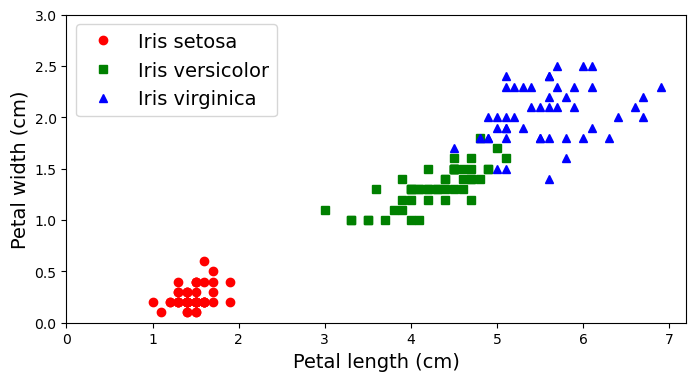

In [13]:
import numpy as np
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.figure(figsize=(8, 4))

for idx, (name, style) in enumerate(zip(iris.target_names, ("ro", "gs", "b^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.axis([0, 7.2, 0, 3])
plt.legend()

plt.show()

Training a simple Decision Tree:

In [ ]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(max_depth=2, random_state=100)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=100)